info about daatset

Combines Classes 0-2 as Drug-Related (1):

Class 0 patterns: Recreational use, misuse
Class 1 patterns: Medical/prescription use
Class 2 patterns: General drug discussion


Treats Class 3 as Not Drug-Related (0):

Handles false positives (e.g., "Lyrica" as a name)
Identifies entertainment/non-drug contexts



- Class 0: Clear drug misuse/abuse (recreational use, dangerous mixing, taking others' meds)
- Class 1: Medical/prescribed drug use (legitimate but potentially concerning usage)
- Class 2: General drug discussion (social commentary, availability, medical facilities)
- Class 3: Non-drug related (mentions that look like drug names but aren't about drugs, e.g., "Lyrica" as a person's name)

#imports

In [1]:
import pandas as pd
import numpy as np
import re
import string
from nltk.tokenize import word_tokenize
import nltk
from sklearn.metrics import accuracy_score, classification_report
from collections import Counter

from nltk.corpus import stopwords
import spacy
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
nlp = spacy.load("en_core_web_sm")




nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('punkt')

import spacy
nlp = spacy.load('en_core_web_sm')

#from wordcloud import WordCloud
import matplotlib.pyplot as plt

import nltk
nltk.download('averaged_perceptron_tagger')


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.


True

#data load

In [2]:
train=pd.read_csv('/content/train.csv')
test=pd.read_csv('/content/test.csv')

In [3]:
train

,text,label
0,<user> <number>its so sad. i've just finished ...,drug related
1,i took adderall to write my paper and now i'm ...,drug related
2,when you take adderall and still can't concent...,drug related
3,tramadol are not friends nor food,drug related
4,"<user> yoga, mediation, exercise and if need...",drug related
...,...,...
11824,anyone got some xanax lol,drug related
11825,"<user> ""pretty much"" he nods and takes off his...",drug related
11826,adderall just slaying,drug related
11827,<user> <user> i have no idea what alprazolam i...,drug related


In [4]:
print(test)

                                                   text         class
0     she sprinkled adderall on her granola with ric...  drug related
1     vyvanse had me telling my life story to a <num...  drug related
2     <user><number> <user><number> <user><number> <...  drug related
3     <user> now that i've got xanax in my smoothie ...  drug related
4             adderall had me doing sit ups at midnight  drug related
...                                                 ...           ...
3266  see that girl who definitely wasn <allcaps>'t ...  drug related
3267  that one time i took adderall and tried to wri...  drug related
3268  here's to me taking penicillin thinking it was...  drug related
3269  <user> <user> i bet i'd have a hard time selli...  drug related
3270  <user> <allcaps>inusa <allcaps> hi. can you po...  drug related

[3271 rows x 2 columns]


In [5]:
test

,text,class
0,she sprinkled adderall on her granola with ric...,drug related
1,vyvanse had me telling my life story to a <num...,drug related
2,<user><number> <user><number> <user><number> <...,drug related
3,<user> now that i've got xanax in my smoothie ...,drug related
4,adderall had me doing sit ups at midnight,drug related
...,...,...
3266,see that girl who definitely wasn <allcaps>'t ...,drug related
3267,that one time i took adderall and tried to wri...,drug related
3268,here's to me taking penicillin thinking it was...,drug related
3269,<user> <user> i bet i'd have a hard time selli...,drug related


In [6]:
t1=test.shape
t2=train.shape
print(t1,t2)

(3271, 2) (11829, 2)


In [7]:
test.columns = ['text', 'label']

#Preprocessing

1. regex

In [8]:

def clean_text(text):
    if isinstance(text, str):
        text = text.lower()#lowercase
        #removal of html like tags
        text = re.sub(r'<user>', '', text)#usernames
        text = re.sub(r'<number>', '', text)#nos
        text = re.sub(r'<hashtag>', '', text)#
        text = re.sub(r'<allcaps>', '', text)#
        text = re.sub(r'<elong>', '', text)#unnecessarily long words eg. pleassssseeeeeeeeeee
        text = re.sub(r'<repeat>', '', text)#words with repeated letters eg heeeellloo
        text = re.sub(r'[^\w\s]', '', text)#punctuatn & special char removal
        text = re.sub(r'\d+', '', text) #no. removal
        tokens = word_tokenize(text)
        return tokens
    else:
        return []
train['text'] = train['text'].apply(clean_text)
test['text'] = test['text'].apply(clean_text)

print(train.head())
print(test.head())





                                                text         label
0  [its, so, sad, ive, just, finished, my, rounds...  drug related
1  [i, took, adderall, to, write, my, paper, and,...  drug related
2  [when, you, take, adderall, and, still, cant, ...  drug related
3           [tramadol, are, not, friends, nor, food]  drug related
4  [yoga, mediation, exercise, and, if, needed, a...  drug related
                                                text         label
0  [she, sprinkled, adderall, on, her, granola, w...  drug related
1  [vyvanse, had, me, telling, my, life, story, t...  drug related
2  [only, the, ones, i, take, now, helped, morphi...  drug related
3  [now, that, ive, got, xanax, in, my, smoothie,...  drug related
4  [adderall, had, me, doing, sit, ups, at, midni...  drug related


2. stop word removal

In [9]:
#swr
stop_words = set(stopwords.words('english'))
def remove_stopwords(token_list):
    filtered_tokens = [word for word in token_list if word.lower() not in stop_words]
    return filtered_tokens
train['text'] = train['text'].apply(remove_stopwords)
test['text'] = test['text'].apply(remove_stopwords)
all_tokens = [word for tokens in train['text'] for word in tokens]

3. stemming

In [10]:
#stemmminngg
from nltk.stem import SnowballStemmer
stemmer = SnowballStemmer('english')
def stem_tokens(token_list):
    return [stemmer.stem(word) for word in token_list]
train['text'] = train['text'].apply(stem_tokens)
test['text'] = test['text'].apply(stem_tokens)

snowball stemmer as it is efficient on comparision to porter and less aggressive than lancaster

- Better Accuracy:
Snowball is often regarded as more accurate than Porter and Lancaster because it employs more refined algorithms. It typically results in better handling of irregular words and complex morphological structures.
- Balance Between Aggressiveness and Precision:
The Snowball Stemmer strikes a good balance between the aggressiveness of stemming (reducing words to their base form) and the preservation of the original meaning. In contrast, the Lancaster Stemmer can be overly aggressive, potentially leading to stems that are too short and lose meaning.


4. Lemmatization

In [11]:
#lemmatizatn
def lemma_tokens(tokens):
    text = ' '.join(tokens)#doing this as df is in list but nlp from spacy expects in string!
    doc = nlp(text)
    return [token.lemma_ for token in doc]

train['text'] = train['text'].apply(lemma_tokens)
test['text'] = test['text'].apply(lemma_tokens)

#EDA

checking for nan vals

In [ ]:
#checking for  NaN values
has_nan = train.isna().any().any()
print("Are there any NaN values in the DataFrame?", has_nan)

has_nan = test.isna().any().any()
print("Are there any NaN values in the DataFrame?", has_nan)

Are there any NaN values in the DataFrame? False
Are there any NaN values in the DataFrame? False


In [ ]:
print(train.dtypes)
print(train.dtypes)

text     object
label    object
dtype: object
text     object
label    object
dtype: object


In [ ]:
#top 1000 freq words
word_counts = Counter(all_tokens)
most_common_words = word_counts.most_common(1000)
print(most_common_words)

[('xanax', 2462), ('adderall', 2229), ('morphine', 1516), ('im', 1488), ('like', 1258), ('take', 1037), ('valium', 953), ('need', 816), ('get', 771), ('amp', 713), ('tramadol', 622), ('got', 590), ('dont', 587), ('pain', 586), ('lyrica', 534), ('methadone', 497), ('time', 423), ('one', 421), ('took', 410), ('oxycodone', 386), ('day', 384), ('know', 381), ('taking', 379), ('oxycontin', 359), ('much', 358), ('ive', 356), ('vyvanse', 351), ('think', 351), ('people', 346), ('cant', 345), ('go', 345), ('good', 343), ('sleep', 341), ('lol', 330), ('really', 329), ('feel', 323), ('shit', 318), ('mg', 306), ('would', 305), ('still', 293), ('hydrocodone', 288), ('na', 285), ('even', 275), ('going', 272), ('seroquel', 268), ('u', 266), ('make', 265), ('work', 263), ('klonopin', 263), ('fuck', 258), ('drug', 257), ('give', 254), ('ativan', 250), ('today', 250), ('night', 250), ('youre', 244), ('right', 244), ('want', 243), ('thats', 242), ('back', 235), ('life', 222), ('diazepam', 221), ('also', 

In [ ]:
from tabulate import tabulate
table = [(word, freq) for word, freq in most_common_words]
print(tabulate(table, headers=['Word', 'Frequency'], tablefmt='grid'))

+-----------------+-------------+
| Word            |   Frequency |
+=================+=============+
| xanax           |        2462 |
+-----------------+-------------+
| adderall        |        2229 |
+-----------------+-------------+
| morphine        |        1516 |
+-----------------+-------------+
| im              |        1488 |
+-----------------+-------------+
| like            |        1258 |
+-----------------+-------------+
| take            |        1037 |
+-----------------+-------------+
| valium          |         953 |
+-----------------+-------------+
| need            |         816 |
+-----------------+-------------+
| get             |         771 |
+-----------------+-------------+
| amp             |         713 |
+-----------------+-------------+
| tramadol        |         622 |
+-----------------+-------------+
| got             |         590 |
+-----------------+-------------+
| dont            |         587 |
+-----------------+-------------+
| pain        

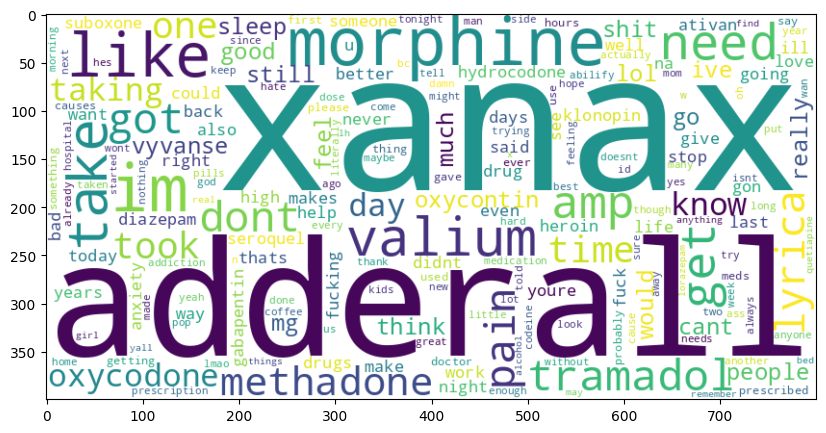

In [ ]:
#wordcloud
word_counts = Counter(all_tokens)
wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(word_counts)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.show()


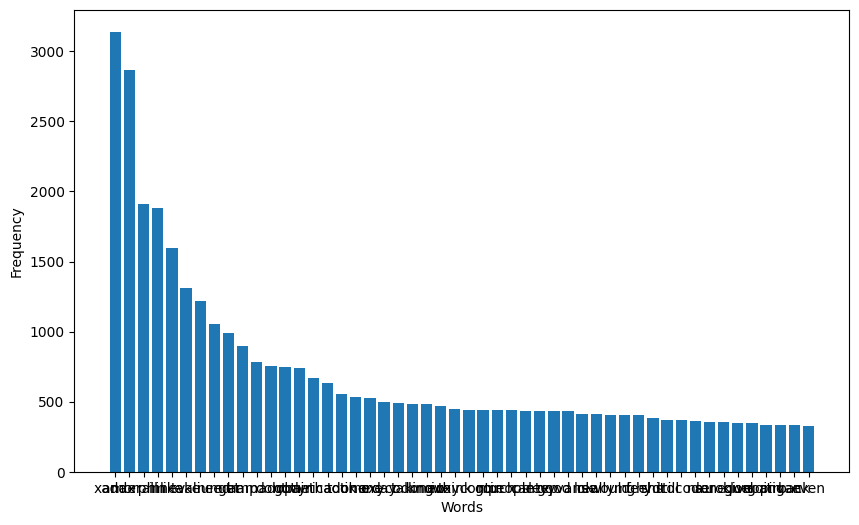

In [ ]:
#histogram
most_common_words = word_counts.most_common(50)
words, counts = zip(*most_common_words)

plt.figure(figsize=(10, 6))
plt.bar(words, counts)
plt.xlabel('Words')
plt.ylabel('Frequency')
plt.show()


#POS

In [12]:
def pos(tokens):
    if isinstance(tokens, list):
        return nltk.pos_tag(tokens)
    else:
        return []
train['pos_tags'] = train['text'].apply(lambda x: pos(x))
test['pos_tags']=test['text'].apply(lambda x: pos(x))


In [13]:
train

,text,label,pos_tags
0,"[sad, I, ve, finish, round, masvingo, provinci...",drug related,"[(sad, JJ), (I, PRP), (ve, VBP), (finish, JJ),..."
1,"[take, adderal, write, paper, I, m, focus, eve...",drug related,"[(take, VB), (adderal, JJ), (write, JJ), (pape..."
2,"[take, adderal, still, can, not, concentr]",drug related,"[(take, VB), (adderal, JJ), (still, RB), (can,..."
3,"[tramadol, friend, food]",drug related,"[(tramadol, NN), (friend, NN), (food, NN)]"
4,"[yoga, mediat, exercis, need, ativan]",drug related,"[(yoga, NN), (mediat, NN), (exercis, VBP), (ne..."
...,...,...,...
11824,"[anyon, get, xanax, lol]",drug related,"[(anyon, NN), (get, VB), (xanax, JJ), (lol, NN)]"
11825,"[pretti, much, nod, take, glove, your, go, to,...",drug related,"[(pretti, RB), (much, JJ), (nod, NNS), (take, ..."
11826,"[adderal, slay]",drug related,"[(adderal, JJ), (slay, NN)]"
11827,"[idea, alprazolam, seem, quit, familiar, docto...",drug related,"[(idea, NN), (alprazolam, NN), (seem, VBP), (q..."


In [14]:
test

,text,label,pos_tags
0,"[sprinkl, adderal, granola, rice, milk, head, ...",drug related,"[(sprinkl, JJ), (adderal, JJ), (granola, NN), ..."
1,"[vyvan, tell, life, stori, year, old, korean, ...",drug related,"[(vyvan, NN), (tell, VB), (life, NN), (stori, ..."
2,"[one, take, help, morphin, do, not, even, help]",drug related,"[(one, CD), (take, NN), (help, NN), (morphin, ..."
3,"[I, ve, get, xanax, smoothi, I, m, cool, cucum...",drug related,"[(I, PRP), (ve, VBP), (get, VB), (xanax, JJ), ..."
4,"[adderal, sit, up, midnight]",drug related,"[(adderal, JJ), (sit, NN), (up, RP), (midnight..."
...,...,...,...
3266,"[see, girl, definit, smuggl, drug, egypt, lie,...",drug related,"[(see, VB), (girl, JJ), (definit, NNS), (smugg..."
3267,"[one, time, take, adderal, tri, write, book]",drug related,"[(one, CD), (time, NN), (take, VB), (adderal, ..."
3268,"[here, take, penicillin, think, pro, plus, lis...",drug related,"[(here, RB), (take, VBP), (penicillin, NN), (t..."
3269,"[bet, i, d, hard, time, sell, adderal, sad]",drug related,"[(bet, NN), (i, NN), (d, VBP), (hard, JJ), (ti..."


#feature engg:keyword extraction

In [15]:
drug_keywords = ["xanax", "Adderall", "morphine", "Valium", "tramadol",
                 "methadone", "oxycodone", "oxycontin", "Vyvanse", "hydrocodone",
                 "Seroquel", "klonopin", "ativan", "gabapentin", "diazepam",
                 "suboxone", "heroin", "codeine", "quetiapine",
                 "lorazepam", "weed", "nicotine", "fentanyl", "opioid",
                 "clonazepam", "opioids", "pregabalin", "cocaine", "percocet",
                 "meth", "coke", "Prozac", "alprazolam", "olanzapine",
                 "opiates", "buprenorphine", "anderson", "zyprexa", "vicodin",
                 "neurontin", "marijuana", "oxy", "heroine", "cannabis",
                 "opiate", "risperidone", "ritalin", "ibuprofen", "risperdal",
                 "zoloft", "cymbalta", "tylenol", "xan", "dilaudid",
                 "molly", "aripiprazole", "antidepressants",
                 "benadryl", "xans"]


In [16]:
keywords=["xanax", "Adderall", "morphine", "Valium", "tramadol", "lyrica",
"methadone", "oxycodone", "oxycontin", "Vyvanse", "hydrocodone",
    "Seroquel", "klonopin", "ativan", "gabapentin", "diazepam",
    "suboxone", "heroin", "codeine", "quetiapine",
    "lorazepam", "weed", "nicotine", "fentanyl", "opioid",
    "clonazepam", "opioids", "pregabalin", "cocaine", "percocet",
    "meth", "coke", "Prozac", "alprazolam", "olanzapine",
    "opiates", "buprenorphine", "anderson", "zyprexa", "vicodin",
    "neurontin", "marijuana", "oxy", "heroine", "cannabis",
    "opiate", "risperidone", "ritalin", "ibuprofen", "risperdal",
    "zoloft", "cymbalta", "tylenol", "xan", "dilaudid",
    "molly", "aripiprazole", "paracetamol", "antidepressants",
    "benadryl", "xans",'adderal actual', 'adderal addict', 'adderal alcohol', 'adderal amp', 'adderal be', 'adderal can', 'adderal clean', 'adderal coffe', 'adderal day', 'adderal do', 'adderal feel', 'adderal focus', 'adderal fuck', 'adderal get', 'adderal give', 'adderal glass', 'adderal go', 'adderal good', 'adderal great', 'adderal help', 'adderal high', 'adderal instead', 'adderal kick', 'adderal last', 'adderal late', 'adderal like', 'adderal lol', 'adderal make', 'adderal pill', 'adderal plug', 'adderal prescript', 'adderal realli', 'adderal red', 'adderal ritalin', 'adderal script', 'adderal someth', 'adderal stay', 'adderal still', 'adderal studi', 'adderal take', 'adderal think', 'adderal today', 'adderal wear', 'adderal work', 'adderal would', 'adderal write', 'adderal xanax', 'adderal you', 'addict adderal', 'addict drug', 'addict morphin', 'addict xanax', 'amp adderal', 'amp lyrica', 'amp morphin', 'amp xanax', 'anoth valium', 'anoth xanax', 'anyon adderal', 'ativan go', 'back xanax', 'bar xanax', 'bitch xanax', 'bottl xanax', 'bring adderal', 'buy adderal', 'buy xanax', 'call adderal', 'close throattri', 'codein plea', 'codein tramadol', 'coffe adderal', 'coffe vyvans', 'come adderal', 'day adderal', 'day xanax', 'dose morphin', 'dose valium', 'drug abus', 'drug addict', 'drug dealer', 'drug like', 'drug take', 'drug test', 'drug use', 'eat xanax', 'enough adderal', 'enough xanax', 'fake xanax', 'find adderal', 'find xanax', 'fuck adderal', 'fuck morphin', 'fuck xanax', 'full adderal', 'full morphin', 'gabapentin use', 'get adderal', 'get ativan', 'get diazepam', 'get methadon', 'get morphin', 'get oxycodon', 'get oxycontin', 'get suboxon', 'get tramadol', 'get valium', 'get xanax', 'give adderal', 'give hydrocodon', 'give morphin', 'give oxycodon', 'give someth', 'give valium', 'give xanax', 'go xanax', 'god adderal', 'half xanax', 'heroin addict', 'heroin morphin', 'high morphin', 'high oxycontin', 'high xanax', 'hospit morphin', 'hydrocodon amp', 'hydrocodon do', 'hydrocodon get', 'hydrocodon pill', 'hydrocodon work', 'inject morphin', 'klonopin make', 'know adderal', 'know morphin', 'know xanax', 'leav morphin', 'like adderal', 'like diazepam', 'like heroin', 'like klonopin', 'like lyrica', 'like methadon', 'like mg', 'like morphin', 'like nicotin', 'like valium', 'like ve', 'like xanax', 'lil xan', 'liquid morphin', 'lot morphin', 'lot xanax', 'love lyrica', 'love morphin', 'love valium', 'love xanax', 'lyrica amp', 'lyrica anderson', 'lyrica do', 'lyrica get', 'lyrica lh', 'lyrica need', 'make xanax', 'mani xanax', 'mean adderal', 'methadon addict', 'methadon clinic', 'methadon mick', 'mg adderal', 'mg ativan', 'mg diazepam', 'mg klonopin', 'mg lorazepam', 'mg methadon', 'mg morphin', 'mg oxycodon', 'mg seroquel', 'mg tramadol', 'mg valium', 'mg xanax', 'mighti morphin', 'mix xanax', 'morphin addict', 'morphin amp', 'morphin be', 'morphin codein', 'morphin do', 'morphin door', 'morphin drip', 'morphin get', 'morphin give', 'morphin good', 'morphin hospit', 'morphin kick', 'morphin like', 'morphin make', 'morphin need', 'morphin pain', 'morphin patch', 'morphin power', 'morphin pump', 'morphin say', 'morphin still', 'morphin sudden', 'morphin take', 'morphin well', 'morphin work', 'much adderal', 'much morphin', 'much valium', 'much xanax', 'need adderal', 'need ativan', 'need diazepam', 'need klonopin', 'need morphin', 'need oxycontin', 'need tramadol', 'need valium', 'need xanax', 'nicotin heroin', 'night adderal', 'not adderal', 'not xanax', 'ocd caus', 'od xanax', 'one xanax', 'opioid addict', 'opioid crisi', 'opioid epidem', 'overdo xanax', 'oxycodon amp', 'oxycodon get', 'oxycodon make', 'oxycodon mg', 'oxycodon pill', 'oxycontin amp', 'pain morphin', 'peopl methadon', 'peopl xanax', 'percocet codein', 'pop adderal', 'pop hydrocodon', 'pop tramadol', 'pop valium', 'pop xanax', 'poppin adderal', 'poppin xanax', 'prescrib adderal', 'prescrib hydrocodon', 'prescrib oxycodon', 'prescrib oxycontin', 'prescrib tramadol', 'prescrib valium', 'prescrib xanax', 'prescript adderal', 'prescript drug', 'prescript oxycodon', 'prescript xanax', 'princ valium', 'prozac valium', 'prozac xanax', 'put morphin', 'put xanax', 'quetiapin make', 'ritalin adderal', 'rush limbaugh', 'say adderal', 'say morphin', 'say xanax', 'sell adderal', 'sell xanax', 'send xanax', 'seroquel make', 'shoot morphin', 'skitzothi caus', 'sleep adderal', 'smoke weed', 'snort adderal', 'snort xanax', 'stop xanax', 'suboxon clinic', 'syndromethi caus', 'take abilifi', 'take adderal', 'take ativan', 'take codein', 'take diazepam', 'take drug', 'take edg', 'take everi', 'take gabapentin', 'take hydrocodon', 'take klonopin', 'take lyrica', 'take morphin', 'take oxycodon', 'take oxycontin', 'take seroquel', 'take suboxon', 'take tramadol', 'take valium', 'take vyvan', 'take vyvans', 'take xanax', 'talk xanax', 'thank adderal', 'thank xanax', 'that xanax', 'think morphin', 'think valium', 'think ve', 'think xanax', 'time adderal', 'tramadol abus', 'tramadol codein', 'tramadol do', 'tramadol get', 'tramadol make', 'tramadol pain', 'tramadol take', 'tri adderal', 'tri get', 'tri oxycodon', 'tri seroquel', 'tri take', 'tri xanax', 'use adderal', 'use methadon', 'use morphin', 'use suboxon', 'use tramadol', 'use valium', 'use xanax', 'valium amp', 'valium calm', 'valium do', 'valium fuck', 'valium get', 'valium go', 'valium good', 'valium lol', 'valium lot', 'valium make', 'valium need', 'valium someth', 'valium villag', 'valium would', 'vyvan adderal', 'vyvan get', 'vyvan make', 'vyvan today', 'wan na', 'want adderal', 'want morphin', 'want xanax', 'weed xanax', 'well adderal', 'wine xanax', 'wish xanax', 'without adderal', 'without xanax', 'xanax adderal', 'xanax addict', 'xanax alcohol', 'xanax amp', 'xanax anxieti', 'xanax bad', 'xanax bar', 'xanax be', 'xanax call', 'xanax chill', 'xanax come', 'xanax could', 'xanax day', 'xanax do', 'xanax drink', 'xanax eat', 'xanax feel', 'xanax fuck', 'xanax get', 'xanax go', 'xanax good', 'xanax hit', 'xanax ill', 'xanax kick', 'xanax lean', 'xanax like', 'xanax lmao', 'xanax lol', 'xanax make', 'xanax need', 'xanax one', 'xanax pill', 'xanax pop', 'xanax prescript', 'xanax problem', 'xanax prozac', 'xanax realli', 'xanax right', 'xanax see', 'xanax shit', 'xanax sleep', 'xanax someth', 'xanax take', 'xanax time', 'xanax today', 'xanax valium', 'xanax watch', 'xanax weed', 'xanax xanax', 'xanax your', 'adderal ai not', 'adderal amp coffe', 'adderal amp red', 'adderal amp xanax', 'adderal ap test', 'adderal ask friend', 'adderal baggi full', 'adderal be not', 'adderal calcul low', 'adderal can not', 'adderal clean room', 'adderal crack cocain', 'adderal daili drink', 'adderal day make', 'adderal day man', 'adderal do not', 'adderal feel like', 'adderal get day', 'adderal get feel', 'adderal get fuck', 'adderal get to', 'adderal glass whiskey', 'adderal go to', 'adderal have not', 'adderal help get', 'adderal last night', 'adderal make feel', 'adderal make want', 'adderal red bull', 'adderal side effect', 'adderal stay focus', 'adderal will not', 'adderal you all', 'adderal you ll', 'addict get methadon', 'alcohol addictionthi caus', 'alcohol morphin ideal', 'amp morphin show', 'amp morphin well', 'amp take xanax', 'amp will not', 'amp xanax addict', 'anderson feat kevin', 'anoth valium gim', 'anoth valium give', 'anybodi get xanax', 'anybodi wan na', 'anyon get morphin', 'anyon get valium', 'anyon wan na', 'around methadon clinic', 'ativan do not', 'babi leav morphin', 'baggi full adderal', 'be not adderal', 'be not xanax', 'bellybutton growthtri methadon', 'caus denialtri abilifi', 'caus denialtri methadon', 'caus infertilitytri methadon', 'caus lonelinesstri methadon', 'close throattri methadon', 'cocain wake back', 'codein do not', 'codein plea do', 'coffe amp adderal', 'cup coffe adderal', 'day adderal red', 'day take adderal', 'diazepam do not', 'do not adderal', 'do not morphin', 'do not xanax', 'doctor give morphin', 'doctor give oxycodon', 'drug like adderal', 'drug like diazepam', 'eat xanax like', 'eclip hearttri methadon', 'edg pot mellow', 'energi drink adderal', 'enough adderal kill', 'even take xanax', 'even though ve', 'ever take adderal', 'feel like adderal', 'feel like morphin', 'feel like ve', 'feenin lyrica anderson', 'focus xanax take', 'forget take adderal', 'forgot take adderal', 'forgot take xanax', 'fuck xanax shit', 'full adderal baggi', 'get adderal prescript', 'get prescrib adderal', 'get prescrib xanax', 'get shoot morphin', 'get to xanax', 'get xanax prescript', 'give anoth valium', 'give hydrocodon pain', 'give morphin pain', 'give morphin take', 'give much morphin', 'go give morphin', 'go methadon clinic', 'go need xanax', 'go take adderal', 'go take valium', 'heroin do not', 'heroin morphin sudden', 'high dose morphin', 'histrion person disorderthi', 'hospit give morphin', 'hour sleep adderal', 'hydrocodon do not', 'intox like nicotin', 'kid take adderal', 'klonopin be not', 'leav morphin door', 'like nicotin heroin', 'like take adderal', 'like take xanax', 'lip like morphin', 'look like xanax', 'lot drug that', 'love valium lot', 'lyrica anderson feenin', 'lyrica anderson freakin', 'lyrica anderson ft', 'lyrica do not', 'marijuana ecstasi alcohol', 'meet methadon clinic', 'mellow cocain wake', 'methadon be not', 'methadon clinic across', 'methadon do not', 'mg klonopin mg', 'might need adderal', 'mighti morphin power', 'mix adderal wait', 'mom love valium', 'morphin be not', 'morphin can not', 'morphin do not', 'morphin door caus', 'morphin good friend', 'morphin milligram equival', 'morphin numb pain', 'morphin power ranger', 'morphin queen vaccin', 'morphin sudden fiend', 'much codein adderal', 'na take xanax', 'narcot alcohol morphin', 'need adderal get', 'need fuck morphin', 'need fuck xanax', 'need high dose', 'need nap xanax', 'need pop xanax', 'need take adderal', 'need take ativan', 'need take valium', 'need take xanax', 'need valium calm', 'need valium someth', 'never take adderal', 'never take xanax', 'nicotin heroin morphin', 'nicotin valium vicodin', 'not fuck xanax', 'not get morphin', 'not give morphin', 'not know lyrica', 'not put morphin', 'not snort adderal', 'not stay morphin', 'not take adderal', 'not take ativan', 'not take seroquel', 'not take vyvan', 'not take xanax', 'not think xanax', 'not work seroquel', 'np lyrica anderson', 'np morphin go', 'okay take xanax', 'one xanax two', 'onlin druggi communiti', 'opiat junki fuck', 'opiat pain killer', 'opioid depend opioid', 'opioid use disord', 'outsid methadon clinic', 'oxycodon be not', 'oxycodon can not', 'oxycodon do not', 'oxycodon go sleep', 'oxycodon put work', 'oxycontin be not', 'oxycontin do not', 'oxycontin great drug', 'oxycontin heavi syrup', 'oxycontin you ll', 'patient opioid addict', 'peopl eat xanax', 'peopl need adderal', 'peopl snort adderal', 'peopl take adderal', 'peopl take codein', 'peopl take oxycontin', 'peopl take xanax', 'perki molli xanni', 'pill amp xanax', 'plea take valium', 'plea take xanax', 'pop anoth xanax', 'pop xanax go', 'pop xanax later', 'pop xanax like', 'pop xanax pill', 'pop xanax someth', 'poppin valium like', 'pot mellow cocain', 'prescrib adderal xanax', 'prescrib risperidon dementia', 'prescrib xanax valium', 'princ valium tonight', 'prostitut methadon addict', 'prozac xanax adderal', 'prozac xanax need', 'pump full morphin', 'purdu pharma oxycontin', 'put morphin iv', 'put xanax coffe', 'quetiapin weight gain', 'quit take adderal', 'quit xanax cold', 'realli like lyrica', 'realli need xanax', 'red bull adderal', 'reduc lyrica dose', 'ree eatin adderal', 'refil xanax prescript', 'risperidon dementia patient', 'roadsid test oxycontin', 'run suboxon clinic', 'say mighti morphin', 'say need adderal', 'say need xanax', 'say take valium', 'say take xanax', 'say valium make', 'serious need adderal', 'seroquel be not', 'seroquel can not', 'seroquel do not', 'seroquel last night', 'seroquel make gain', 'seroquel someth like', 'she morphin queen', 'shit take xanax', 'shock syndromethi caus', 'shoe xanax tab', 'shouldv take xanax', 'shower time adderal', 'side effect adderal', 'side effect gabapentin', 'side effect lyrica', 'side effect valium', 'someon bring adderal', 'someon give adderal', 'someon sell adderal', 'someon slip adderal', 'stay focus xanax', 'steroid adderal crack', 'still fuck xanax', 'still take xanax', 'stop take adderal', 'stop take xanax', 'stop tramadol abus', 'suboxon be not', 'suffer alcohol addictionthi', 'take adderal amp', 'take adderal can', 'take adderal clean', 'take adderal could', 'take adderal daili', 'take adderal do', 'take adderal drink', 'take adderal everyday', 'take adderal feel', 'take adderal focus', 'take adderal fuck', 'take adderal get', 'take adderal go', 'take adderal instead', 'take adderal late', 'take adderal pm', 'take adderal stay', 'take adderal still', 'take adderal studi', 'take adderal take', 'take adderal today', 'take adderal work', 'take adderal write', 'take anoth xanax', 'take ativan go', 'take enough xanax', 'take half xanax', 'take hydrocodon pill', 'take mani xanax', 'take mg ativan', 'take mg klonopin', 'take much adderal', 'take oxycodon amp', 'take pain away', 'take seroquel last', 'take tramadol amp', 'take tramadol go', 'take two valium', 'take valium go', 'take valium panic', 'take valium read', 'take vyvan today', 'take xanax amp', 'take xanax chill', 'take xanax day', 'take xanax eat', 'take xanax get', 'take xanax go', 'take xanax lean', 'take xanax like', 'take xanax lmao', 'take xanax sleep', 'take xanax take', 'take xanax today', 'tell take adderal', 'tell take xanax', 'thank god adderal', 'thank god morphin', 'thank god ve', 'thank god xanax', 'think need adderal', 'three day adderal', 'time adderal glass', 'time take adderal', 'time take valium', 'time take xanax', 'to need xanax', 'to take adderal', 'to take xanax', 'total eclip hearttri', 'towel give anoth', 'toxic shock syndromethi', 'tramadol be not', 'tramadol do not', 'tramadol take edg', 'tramadol will not', 'turn orangetri methadon', 'use methadon pain', 'valium be not', 'valium can not', 'valium do not', 'valium give anoth', 'valium go bed', 'valium lot drug', 'valium panic attack', 'valium vicodin marijuana', 'valium villag vine', 've get tramadol', 've take adderal', 've take much', 've take tramadol', 've take valium', 'vicodin marijuana ecstasi', 'vodka valium latt', 'voic headtri methadon', 'vyvan keep night', 'wait adderal kick', 'wake back morphin', 'way much adderal', 'whether narcot alcohol', 'work methadon clinic', 'work realli well', 'write prescript xanax', 'xanax amp patron', 'xanax ask friend', 'xanax be not', 'xanax can not', 'xanax chill fuck', 'xanax day keep', 'xanax do not', 'xanax go bed', 'xanax go sleep', 'xanax go to', 'xanax like candi', 'xanax make feel', 'xanax take edg', 'xanax year old', 'xanax you ll', 'xs daili mg']

did keyword extraction by taking frequently repeated words,n-grams, code for n-grams part is in appendix

#somme stuff to get dataset type workable

In [ ]:
# each entry in text is list
train['is_list'] = train['text'].apply(lambda x: isinstance(x, list))

print(train[['text', 'is_list']])

                                                    text  is_list
0      [sad, I, ve, finish, round, masvingo, provinci...     True
1      [take, adderal, write, paper, I, m, focus, eve...     True
2             [take, adderal, still, can, not, concentr]     True
3                               [tramadol, friend, food]     True
4                  [yoga, mediat, exercis, need, ativan]     True
...                                                  ...      ...
11824                           [anyon, get, xanax, lol]     True
11825  [pretti, much, nod, take, glove, your, go, to,...     True
11826                                    [adderal, slay]     True
11827  [idea, alprazolam, seem, quit, familiar, docto...     True
11828           [relax, take, valium, take, two, valium]     True

[11829 rows x 2 columns]


In [ ]:
test['is_list'] = test['text'].apply(lambda x: isinstance(x, list))

print(train[['text', 'is_list']])

                                                    text  is_list
0      [sad, I, ve, finish, round, masvingo, provinci...     True
1      [take, adderal, write, paper, I, m, focus, eve...     True
2             [take, adderal, still, can, not, concentr]     True
3                               [tramadol, friend, food]     True
4                  [yoga, mediat, exercis, need, ativan]     True
...                                                  ...      ...
11824                           [anyon, get, xanax, lol]     True
11825  [pretti, much, nod, take, glove, your, go, to,...     True
11826                                    [adderal, slay]     True
11827  [idea, alprazolam, seem, quit, familiar, docto...     True
11828           [relax, take, valium, take, two, valium]     True

[11829 rows x 2 columns]


#rules

##maxvote

In [23]:
quantity_units = ["mg", "ml", "pills", "tabs", "tablets"]
intent_words = ["buy", "sell", "need", "get", "available", "take", "want", "have"]
prescribed_terms = ["prescription", "doctor", "pharmacy", "dose", "appointment"]
non_drug_keywords = ["lyrica", "celebrity", "actor", "singer"]
emo_context = ["can't focus", "helps with", "need more"]
recreational = ["for fun", "to relax", "for a good time"]
sideeffs=["can't sleep","headache","dizzy","calm"]
slang=["pop a pill","xanny","on the meds"]
socialcont=["friend","party","last night"]
negation=["don't take","not on meds"]


In [24]:
#rule 1:qty of drugs are mentioned ( mg, tablets)
def rule_quantity_mentions(text):
    return any(drug in text for drug in drug_keywords) and any(unit in text for unit in quantity_units)

#rule 2:intent to acquire drugs (buy,sell)
def rule_intent_to_acquire(text):
    return any(drug in text for drug in keywords) and any(action in text for action in intent_words)

#rule3:repeated drug no
def rule_repeated_mentions(text):
    return any(text.count(drug) >= 1 for drug in keywords)

#rule 4:terms related to prescriptions or doctors
def rule_prescribed_terms(text):
    return any(term in text for term in prescribed_terms)

#rule 5: non-drug keywords (celeb,movie)
def words_not_in_keywords(text):
    return any(non_drug in text for non_drug in non_drug_keywords)

#rule 6:emotional context (can't focus, helps with)
def emo_contexts(text):
    return any(context in text for context in emo_context)

#rule7:recreational use patterns (for fun,to relax)
def rule_recreational_use(text):
    return any(recreate in text for recreate in recreational )

#rule 8: Checking for symptoms and side effects (can't sleep headache)
def rule_symptoms_side_effects(text):
    return any(side in text for side in sideeffs)

# Rule 10: Slang/colloquial drug use (e.g., "pop a pill", "xanny", "on the meds")
def rule_slang_use(text):
    return  any(slag in text for slag in slang)
# Rule 11: Social context indicators (e.g., "party", "friend")
def rule_social_context(text):
    return any(social in text for social in socialcont)

# Rule 12: Negation patterns (Non-drug context)
def rule_negation_patterns(text):
    return any(neg in text for neg in negation)


In [25]:
def apply_rules(row):
    text = row['text']

    row['quantity_mention'] = rule_quantity_mentions(text)
    row['intent_to_acquire'] = rule_intent_to_acquire(text)
    row['repeated_mention'] = rule_repeated_mentions(text)
    row['prescribed_terms'] = rule_prescribed_terms(text)
    row['non_drug_keywords'] = words_not_in_keywords(text)
    row['emo_context'] = emo_contexts(text)
    row['recreational'] = rule_recreational_use(text)
    row['symptoms_side_effects'] = rule_symptoms_side_effects(text)
    row['slang_use'] = rule_slang_use(text)
    row['social_context'] = rule_social_context(text)
    row['negation_patterns'] = rule_negation_patterns(text)

    return row

In [ ]:
train = train.apply(apply_rules, axis=1)
test = test.apply(apply_rules, axis=1)


In [ ]:

train['label_quantity_mention'] = train['quantity_mention'].apply(lambda x: 'drug related' if x else 'not drug related')
train['label_intent_to_acquire'] = train['intent_to_acquire'].apply(lambda x: 'drug related' if x else 'not drug related')
train['label_repeated_mention'] = train['repeated_mention'].apply(lambda x: 'drug related' if x else 'not drug related')
train['label_prescribed_terms'] = train['prescribed_terms'].apply(lambda x: 'drug related' if x else 'not drug related')
train['non_drug_keywords'] = train['non_drug_keywords'].apply(lambda x: 'drug related' if x else 'not drug related')
train['emo_context'] =train['emo_context'].apply(lambda x: 'drug related' if x else 'not drug related')
train['recreational'] = train['recreational'].apply(lambda x: 'drug related' if x else 'not drug related')
train['symptoms_side_effects'] = train['symptoms_side_effects'].apply(lambda x: 'drug related' if x else 'not drug related')
train['slang_use'] = train['slang_use'].apply(lambda x: 'drug related' if x else 'not drug related')
train['social_context'] = train['social_context'].apply(lambda x: 'drug related' if x else 'not drug related')
train['negation_patterns'] =train['negation_patterns'].apply(lambda x: 'drug related' if x else 'not drug related')




test['label_quantity_mention'] = test['quantity_mention'].apply(lambda x: 'drug related' if x else 'not drug related')
test['label_intent_to_acquire'] = test['intent_to_acquire'].apply(lambda x: 'drug related' if x else 'not drug related')
test['label_repeated_mention'] = test['repeated_mention'].apply(lambda x: 'drug related' if x else 'not drug related')
test['label_prescribed_terms'] = test['prescribed_terms'].apply(lambda x: 'drug related' if x else 'not drug related')
test['non_drug_keywords'] = test['non_drug_keywords'].apply(lambda x: 'drug related' if x else 'not drug related')
test['emo_context'] =test['emo_context'].apply(lambda x: 'drug related' if x else 'not drug related')
test['recreational'] = test['recreational'].apply(lambda x: 'drug related' if x else 'not drug related')
test['symptoms_side_effects'] = test['symptoms_side_effects'].apply(lambda x: 'drug related' if x else 'not drug related')
test['slang_use'] = test['slang_use'].apply(lambda x: 'drug related' if x else 'not drug related')
test['social_context'] =test['social_context'].apply(lambda x: 'drug related' if x else 'not drug related')
test['negation_patterns'] =test['negation_patterns'].apply(lambda x: 'drug related' if x else 'not drug related')


voyes

In [ ]:
def voting_based_label(row):
    votes = [
        row['label_quantity_mention'],
        row['label_intent_to_acquire'],
        row['label_repeated_mention'],
        row['label_prescribed_terms'],
        row['non_drug_keywords'],
        row['emo_context'],
        row['recreational'],
        row['symptoms_side_effects'],
        row['slang_use'],
        row['social_context'],
        row['negation_patterns']
    ]
    drug_related_votes = votes.count('drug related')
    non_drug_related_votes = votes.count('not drug related')

    if drug_related_votes >=3:
        return 'drug related'
    elif non_drug_related_votes >=3:
        return 'not drug related'
    else:
        return 'uncertain'


In [ ]:

train['final_label'] = train.apply(voting_based_label, axis=1)
test['final_label'] = test.apply(voting_based_label, axis=1)

In [ ]:

print("Evaluation on Test Set:")
accuracy = accuracy_score(test['label'], test['final_label'])
print(f"Accuracy: {accuracy:.4f}")


Evaluation on Test Set:
Accuracy: 0.0578


##w/o max votecnt

checkingg fordrug context rules first to capture drug related

In [ ]:
def rule_based_label(row):
    if row['quantity_mention'] or row['intent_to_acquire'] or row['repeated_mention'] or \
       row['prescribed_terms'] or row['emo_context'] or row['recreational'] or \
       row['symptoms_side_effects'] or row['slang_use'] or row['social_context']:
        return 'drug related'

    if row['non_drug_keywords'] or row['negation_patterns']:
        return 'not drug related'

    return 'uncertain'

train['final_label'] = train.apply(rule_based_label, axis=1)
test['final_label'] = test.apply(rule_based_label, axis=1)


print("Evaluation on Test Set:")
accuracy = accuracy_score(test['label'], test['final_label'])
print(f"Accuracy: {accuracy:.4f}")


Evaluation on Test Set:
Accuracy: 0.9612


In [ ]:
print("\nClassification Report:")
print(classification_report(test['label'], test['final_label']))


Classification Report:
                  precision    recall  f1-score   support

    drug related       0.96      1.00      0.98      3144
not drug related       0.00      0.00      0.00       127

        accuracy                           0.96      3271
       macro avg       0.48      0.50      0.49      3271
    weighted avg       0.92      0.96      0.94      3271



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


    # checkingg for non-drug context rules first to capture not drug related

In [ ]:
def rule_based_label(row):

    if row['non_drug_keywords'] or row['negation_patterns']:
        return 'not drug related'

    if row['quantity_mention'] or row['intent_to_acquire'] or row['repeated_mention'] or \
       row['prescribed_terms'] or row['emo_context'] or row['recreational'] or \
       row['symptoms_side_effects'] or row['slang_use'] or row['social_context']:
        return 'drug related'

    return 'uncertain'

train['final_label'] = train.apply(rule_based_label, axis=1)
test['final_label'] = test.apply(rule_based_label, axis=1)


print("Classification Report:")
print(classification_report(test['label'], test['final_label']))


Classification Report:
                  precision    recall  f1-score   support

    drug related       0.00      0.00      0.00      3144
not drug related       0.04      1.00      0.07       127

        accuracy                           0.04      3271
       macro avg       0.02      0.50      0.04      3271
    weighted avg       0.00      0.04      0.00      3271



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


thresholding based penalty

In [ ]:
#weighted score system
rule_weights = {
    'quantity_mention': 1,
    'intent_to_acquire': 1.5,
    'repeated_mention': 3,
    'prescribed_terms': 2.5,
    'non_drug_keywords': -1,
    'emo_context': 0.5,
    'recreational': 0.5,
    'symptoms_side_effects': 1.5,
    'slang_use': 1,
    'social_context': 0.5,
    'negation_patterns': -1,
}

def calculate_score(row):
    score = 0
    for rule, weight in rule_weights.items():
        if row[rule]:
            score += weight
    return score

train['score'] = train.apply(calculate_score, axis=1)
test['score'] = test.apply(calculate_score, axis=1)

def final_label_based_on_score(row):
    if row['score'] >= 2:
        return 'drug related'
    elif row['score'] <= -2:
        return 'not drug related'
    else:
        return 'uncertain'

train['final_label'] = train.apply(final_label_based_on_score, axis=1)
test['final_label'] = test.apply(final_label_based_on_score, axis=1)



print("Evaluation on Test Set:")
accuracy = accuracy_score(test['label'], test['final_label'])
print(f"Accuracy: {accuracy:.4f}")



Evaluation on Test Set:
Accuracy: 0.4537


In [ ]:

print("Classification Report:")
print(classification_report(test['label'], test['final_label']))

Classification Report:
                  precision    recall  f1-score   support

    drug related       0.99      0.47      0.64      3144
not drug related       0.00      0.00      0.00       127
       uncertain       0.00      0.00      0.00         0

        accuracy                           0.45      3271
       macro avg       0.33      0.16      0.21      3271
    weighted avg       0.95      0.45      0.61      3271



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_

ob:as weights are increased acc increases
Score Calculation: each doc's score is calculated by summing up the weights of the matching rules. A higher score means the doc is more likely to be classified as "drug related", while a lower score indicates "not drug related."

for a threshold of -3,3 my acc was 0.44 and for -2,2 it was 0.45

In [ ]:
def classify(text)

#trying to resolve class imbalance by class weightage

Class Weights: Defined class_weights dictionary, where 'drug related' is given a higher weight (1.5) than 'not drug related' (1). This penalizes misclassifying the minority class and gives it more influence during voting.

Weighted Voting: In the weighted_voting_based_label function, votes for "drug related" and "not drug related" labels are adjusted based on their weights. The final classification depends on the weighted sum of all rule-based votes.

Threshold Adjustment: You can adjust the threshold values (7.5 and 5.5 in the example) based on your dataset and how sensitive you want the classifier to be to the "drug related" class.

Why This Approach Helps:
By assigning higher weights to "drug related," the system becomes more sensitive to identifying instances of drug-related content, even when they are in the minority.
The use of a weighted voting mechanism ensures that the minority class is emphasized, and the model's overall performance (accuracy, precision, recall) can be improved for the underrepresented class.

In [ ]:
#Class Weights for Voting
class_weights = {
    'drug related': 1.5,  # Higher weight for "drug related" class
    'not drug related': 1  # Lower weight for "not drug related" class
}


def weighted_voting_based_label(row):
    votes = [
        row['quantity_mention'],
        row['intent_to_acquire'],
        row['repeated_mention'],
        row['prescribed_terms'],
        row['non_drug_keywords'],
        row['emo_context'],
        row['recreational'],
        row['symptoms_side_effects'],
        row['slang_use'],
        row['social_context'],
        row['negation_patterns']
    ]

    weighted_votes = 0
    for vote in votes:
        if vote:
            weighted_votes += class_weights['drug related']
        else:
            weighted_votes += class_weights['not drug related']

    if weighted_votes >= 7.5:
        return 'drug related'
    elif weighted_votes <= 5.5:
        return 'not drug related'
    else:
        return 'uncertain'

train['final_label'] = train.apply(weighted_voting_based_label, axis=1)
test['final_label'] = test.apply(weighted_voting_based_label, axis=1)

print("Evaluation on Test Set:")
accuracy = accuracy_score(test['label'], test['final_label'])
print(f"Accuracy: {accuracy:.4f}")


Evaluation on Test Set:
Accuracy: 0.9612


In [ ]:

print("Classification Report:")
print(classification_report(test['label'], test['final_label']))

Classification Report:
                  precision    recall  f1-score   support

    drug related       0.96      1.00      0.98      3144
not drug related       0.00      0.00      0.00       127

        accuracy                           0.96      3271
       macro avg       0.48      0.50      0.49      3271
    weighted avg       0.92      0.96      0.94      3271



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


#adding some rules for not druggy

In [ ]:
quantity_units = ["mg", "ml", "pills", "tabs", "tablets"]
intent_words = ["buy", "sell", "need", "get", "available", "take", "want", "have"]
prescribed_terms = ["prescription", "doctor", "pharmacy", "dose", "appointment"]
non_drug_keywords = ["lyrica", "celebrity", "actor", "singer", "music", "album", "song", "concert", "artist", "tv", "movie"]
emo_context = ["can't focus", "helps with", "need more"]
recreational = ["for fun", "to relax", "for a good time"]
sideeffs=["can't sleep","headache","dizzy","calm"]
slang=["pop a pill","xanny","on the meds"]
socialcont=["friend","party","last night"]
negation=["don't take","not on meds"]


In [ ]:
#rule 1:qty of drugs are mentioned ( mg, tablets)
def rule_quantity_mentions(text):
    return any(drug in text for drug in drug_keywords) and any(unit in text for unit in quantity_units)

# Rule 2: Checking for intent to acquire drugs (e.g., "buy", "sell")
def rule_intent_to_acquire(text):
    return any(drug in text for drug in  drug_keywords) and any(action in text for action in intent_words)

# Rule 3: Checking for repeated mentions of drugs
def rule_repeated_mentions(text):
    return any(text.count(drug) >= 1 for drug in  drug_keywords)

# Rule 4: Checking for terms related to prescriptions or doctors
def rule_prescribed_terms(text):
    return any(term in text for term in prescribed_terms)

# Rule 5: Checking for presence of non-drug keywords (e.g., "celebrity", "movie")
def words_not_in_keywords(text):
    return any(non_drug in text for non_drug in non_drug_keywords)

# Rule 6: Checking for emotional context (e.g., "can't focus", "helps with")
def emo_contexts(text):
    return any(context in text for context in emo_context)

# Rule 7: Checking for recreational use patterns (e.g., "for fun", "to relax")
def rule_recreational_use(text):
    return any(recreate in text for recreate in recreational )

# Rule 8: Checking for symptoms and side effects (e.g., "can't sleep", "headache")
def rule_symptoms_side_effects(text):
    return any(side in text for side in sideeffs)

# Rule 10: Slang/colloquial drug use (e.g., "pop a pill", "xanny", "on the meds")
def rule_slang_use(text):
    return  any(slag in text for slag in slang)
# Rule 11: Social context indicators (e.g., "party", "friend")
def rule_social_context(text):
    return any(social in text for social in socialcont)

# Rule 12: Negation patterns (Non-drug context)
def rule_negation_patterns(text):
    return any(neg in text for neg in negation)

# Rule 13: Checking for positive or neutral emotional context (related to **celebrities**, **songs**, etc.)
def rule_positive_emo_context(text):
    return any(context in text for context in emo_context) and not any(drug in text for drug in drug_keywords)

# Rule 14: Checking for casual or entertainment-based social context (e.g., "last night", "party")
def rule_entertainment_social_context(text):
    return any(social in text for social in socialcont) and not any(drug in text for drug in drug_keywords)

In [ ]:
def apply_rules(row):
    text = row['text']

    row['quantity_mention'] = rule_quantity_mentions(text)
    row['intent_to_acquire'] = rule_intent_to_acquire(text)
    row['repeated_mention'] = rule_repeated_mentions(text)
    row['prescribed_terms'] = rule_prescribed_terms(text)
    row['non_drug_keywords'] = words_not_in_keywords(text)
    row['emo_context'] = emo_contexts(text)
    row['recreational'] = rule_recreational_use(text)
    row['symptoms_side_effects'] = rule_symptoms_side_effects(text)
    row['slang_use'] = rule_slang_use(text)
    row['social_context'] = rule_social_context(text)
    row['negation_patterns'] = rule_negation_patterns(text)
    row['positive_emo_context']=rule_positive_emo_context
    row['enter social cont']=rule_entertainment_social_context

    return row

In [ ]:
train = train.apply(apply_rules, axis=1)
test = test.apply(apply_rules, axis=1)


In [ ]:
#assigning initial labels based on each rule
train['label_quantity_mention'] = train['quantity_mention'].apply(lambda x: 'drug related' if x else 'not drug related')
train['label_intent_to_acquire'] = train['intent_to_acquire'].apply(lambda x: 'drug related' if x else 'not drug related')
train['label_repeated_mention'] = train['repeated_mention'].apply(lambda x: 'drug related' if x else 'not drug related')
train['label_prescribed_terms'] = train['prescribed_terms'].apply(lambda x: 'drug related' if x else 'not drug related')
train['non_drug_keywords'] = train['non_drug_keywords'].apply(lambda x: 'drug related' if x else 'not drug related')
train['emo_context'] =train['emo_context'].apply(lambda x: 'drug related' if x else 'not drug related')
train['recreational'] = train['recreational'].apply(lambda x: 'drug related' if x else 'not drug related')
train['symptoms_side_effects'] = train['symptoms_side_effects'].apply(lambda x: 'drug related' if x else 'not drug related')
train['slang_use'] = train['slang_use'].apply(lambda x: 'drug related' if x else 'not drug related')
train['social_context'] = train['social_context'].apply(lambda x: 'drug related' if x else 'not drug related')
train['negation_patterns'] =train['negation_patterns'].apply(lambda x: 'drug related' if x else 'not drug related')

train['positive_emo_context'] =train['positive_emo_context'].apply(lambda x: 'drug related' if x else 'not drug related')
train['enter social cont'] =train['enter social cont'].apply(lambda x: 'drug related' if x else 'not drug related')





test['label_quantity_mention'] = test['quantity_mention'].apply(lambda x: 'drug related' if x else 'not drug related')
test['label_intent_to_acquire'] = test['intent_to_acquire'].apply(lambda x: 'drug related' if x else 'not drug related')
test['label_repeated_mention'] = test['repeated_mention'].apply(lambda x: 'drug related' if x else 'not drug related')
test['label_prescribed_terms'] = test['prescribed_terms'].apply(lambda x: 'drug related' if x else 'not drug related')
test['non_drug_keywords'] = test['non_drug_keywords'].apply(lambda x: 'drug related' if x else 'not drug related')
test['emo_context'] =test['emo_context'].apply(lambda x: 'drug related' if x else 'not drug related')
test['recreational'] = test['recreational'].apply(lambda x: 'drug related' if x else 'not drug related')
test['symptoms_side_effects'] = test['symptoms_side_effects'].apply(lambda x: 'drug related' if x else 'not drug related')
test['slang_use'] = test['slang_use'].apply(lambda x: 'drug related' if x else 'not drug related')
test['social_context'] =test['social_context'].apply(lambda x: 'drug related' if x else 'not drug related')
test['negation_patterns'] =test['negation_patterns'].apply(lambda x: 'drug related' if x else 'not drug related')

test['positive_emo_context'] =test['positive_emo_context'].apply(lambda x: 'drug related' if x else 'not drug related')
test['enter social cont'] =test['enter social cont'].apply(lambda x: 'drug related' if x else 'not drug related')


In [ ]:
# Voting-based label function
def voting_based_label(row):
    votes = [
        row['label_quantity_mention'],
        row['label_intent_to_acquire'],
        row['label_repeated_mention'],
        row['label_prescribed_terms'],
        row['non_drug_keywords'],
        row['emo_context'],
        row['recreational'],
        row['symptoms_side_effects'],
        row['slang_use'],
        row['social_context'],
        row['negation_patterns'],
        row['positive_emo_context'],
    row['enter social cont']]
    drug_related_votes = votes.count('drug related')
    non_drug_related_votes = votes.count('not drug related')

    if drug_related_votes >=3:
        return 'drug related'
    elif non_drug_related_votes >=3:
        return 'not drug related'
    else:
        return 'uncertain'


In [ ]:

train['final_label'] = train.apply(voting_based_label, axis=1)
test['final_label'] = test.apply(voting_based_label, axis=1)

In [ ]:

print("Evaluation on Test Set:")
accuracy = accuracy_score(test['label'], test['final_label'])
print(f"Accuracy: {accuracy:.4f}")


Evaluation on Test Set:
Accuracy: 0.4778


In [ ]:

print("Classification Report:")
print(classification_report(test['label'], test['final_label']))

Classification Report:
                  precision    recall  f1-score   support

    drug related       0.94      0.49      0.64      3144
not drug related       0.02      0.23      0.03       127

        accuracy                           0.48      3271
       macro avg       0.48      0.36      0.34      3271
    weighted avg       0.90      0.48      0.62      3271



In [22]:

# Define a function to apply the if-elif ladder for classification
def classifyy(row):
    text = row['text']

   # if row['quantity_mention']:
    #    return 'drug related'
    if row['intent_to_acquire']:
        return 'drug related'
    elif row['repeated_mention']:
        return 'drug related'
    elif row['prescribed_terms']:
        return 'drug related'
    elif row['emo_context']:
        return 'drug related'
    elif row['recreational']:
        return 'drug related'
    elif row['symptoms_side_effects']:
        return 'drug related'
    elif row['slang_use']:
        return 'drug related'
    elif row['social_context']:
        return 'drug related'
    elif row['negation_patterns']:
        return 'not drug related'
    elif row['positive_emo_context']:
        return 'not drug related'
    elif row['enter_social_cont']:
        return 'not drug related'
    elif row['non_drug_keywords']:
        return 'not drug related'
    else:
        return 'uncertain'


train['final_label'] = train.apply(classifyy, axis=1)
test['final_label'] = test.apply(classifyy, axis=1)


KeyError: 'intent_to_acquire'

#appendix

n grams

In [ ]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer


In [ ]:
def generate_ngrams(df, n):
    vectorizer = CountVectorizer(ngram_range=(n, n))
    ngrams = vectorizer.fit_transform(df['text'])
    return ngrams, vectorizer.get_feature_names_out()


In [ ]:
# Generate unigrams
unigrams, unigram_features = generate_ngrams(df, 1)
print("Unigrams:\n", unigram_features)
print("Unigram Counts:\n", unigrams.toarray())

# Generate bigrams
bigrams, bigram_features = generate_ngrams(df, 2)
print("\nBigrams:\n", bigram_features)
print("Bigram Counts:\n", bigrams.toarray())

# Generate trigrams
trigrams, trigram_features = generate_ngrams(df, 3)
print("\nTrigrams:\n", trigram_features)
print("Trigram Counts:\n", trigrams.toarray())


Unigrams:
 ['a_clink' 'aa' 'aaaaaaaaaaaaaaaah' ... 'ódio' 'βblocker' 'ψhospit']
Unigram Counts:
 [[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]

Bigrams:
 ['a_clink xanax' 'aa nanci' 'aa shoot' ... 'ódio de' 'βblocker enoxaparin'
 'ψhospit amp']
Bigram Counts:
 [[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]

Trigrams:
 ['a_clink xanax trazedon' 'aa nanci like' 'aa shoot mezcal' ...
 'ódio de simpson' 'βblocker enoxaparin morphin' 'ψhospit amp mgs']
Trigram Counts:
 [[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


In [ ]:
def get_top_ngrams(df, n, top_n=1000):
    vectorizer = CountVectorizer(ngram_range=(n, n), max_features=top_n)
    ngram_counts = vectorizer.fit_transform(df['text'])
    sum_counts = ngram_counts.sum(axis=0)
    ngrams = vectorizer.get_feature_names_out()

    ngram_freq = pd.DataFrame(sum_counts, columns=ngrams).T
    ngram_freq.columns = ['count']
    ngram_freq = ngram_freq.sort_values(by='count', ascending=False)

    return ngram_freq.head(top_n)


In [ ]:
#unigrams
top_unigrams = get_top_ngrams(df, 1, top_n=1000)
print("Top 1000 Unigrams:\n", tabulate(top_unigrams.reset_index().values, headers=['Word', 'Frequency'], tablefmt='grid'))

#bigrams
top_bigrams = get_top_ngrams(df, 2, top_n=1000)
print("\nTop 1000 Bigrams:\n", tabulate(top_bigrams.reset_index().values, headers=['Word', 'Frequency'], tablefmt='grid'))

#trigrams
top_trigrams = get_top_ngrams(df, 3, top_n=1000)
print("\nTop 1000 Trigrams:\n", tabulate(top_trigrams.reset_index().values, headers=['Word', 'Frequency'], tablefmt='grid'))

Streaming output truncated to the last 5000 lines.
| rt              |          38 |
+-----------------+-------------+
| ambien          |          38 |
+-----------------+-------------+
| pump            |          38 |
+-----------------+-------------+
| interest        |          37 |
+-----------------+-------------+
| doubl           |          37 |
+-----------------+-------------+
| danger          |          37 |
+-----------------+-------------+
| mess            |          37 |
+-----------------+-------------+
| cannabi         |          37 |
+-----------------+-------------+
| shot            |          37 |
+-----------------+-------------+
| becom           |          37 |
+-----------------+-------------+
| street          |          37 |
+-----------------+-------------+
| iv              |          37 |
+-----------------+-------------+
| laugh           |          37 |
+-----------------+-------------+
| power           |          37 |
+-----------------+------------

In [ ]:
from tabulate import tabulate


In [ ]:
input_string="adderal actual ,  adderal addict ,  adderal alcohol ,  adderal amp ,  adderal be ,  adderal can ,  adderal clean ,  adderal coffe ,  adderal day ,  adderal do ,  adderal feel ,  adderal focus ,  adderal fuck ,  adderal get ,  adderal give ,  adderal glass ,  adderal go ,  adderal good ,  adderal great ,  adderal help ,  adderal high ,  adderal instead ,  adderal kick ,  adderal last ,  adderal late ,  adderal like ,  adderal lol ,  adderal make ,  adderal pill ,  adderal plug, adderal prescript, adderal realli, adderal red, adderal ritalin, adderal script, adderal someth, adderal stay, adderal still, adderal studi, adderal take, adderal think, adderal today, adderal wear, adderal work, adderal would, adderal write, adderal xanax, adderal you, addict adderal, addict drug, addict morphin, addict xanax, amp adderal, amp lyrica, amp morphin, amp xanax, anoth valium, anoth xanax, anyon adderal, ativan go, back xanax, bar xanax, bitch xanax, bottl xanax,bring adderal, buy adderal, buy xanax, call adderal, close throattri, codein plea, codein tramadol, coffe adderal, coffe vyvans, come adderal, day adderal, day xanax, dose morphin, dose valium, drug abus, drug addict, drug dealer, drug like, drug take, drug test, drug use, eat xanax, enough adderal, enough xanax, fake xanax, find adderal, find xanax, fuck adderal, fuck morphin, fuck xanax, full adderal, full morphin, gabapentin use, get adderal, get ativan, get diazepam, get methadon, get morphin, get oxycodon, get oxycontin, get suboxon, get tramadol, get valium, get xanax, give adderal, give hydrocodon, give morphin, give oxycodon, give someth, give valium, give xanax, go xanax, god adderal, half xanax, heroin addict, heroin morphin, high morphin, high oxycontin, high xanax, hospit morphin, hydrocodon amp, hydrocodon do, hydrocodon get, hydrocodon pill, hydrocodon work, inject morphin, klonopin make, know adderal, know lyrica, know morphin, know xanax, leav morphin,  like adderal ,  like diazepam ,  like heroin ,  like klonopin ,  like lyrica , like methadon ,  like mg ,  like morphin ,  like nicotin ,   like valium , like ve, like xanax, lil xan, liquid morphin, lot morphin, lot xanax,love lyrica, love morphin, love valium, love xanax, lyrica amp, lyrica anderson, lyrica do, lyrica get, lyrica lh, lyrica need, make xanax, mani xanax, mean adderal, methadon addict, methadon clinic, methadon mick, mg adderal, mg ativan, mg diazepam, mg klonopin, mg lorazepam, mg methadon, mg morphin, mg oxycodon, mg seroquel, mg tramadol, mg valium, mg xanax, mighti morphin, mix xanax, morphin addict, morphin amp, morphin be, morphin codein, morphin do, morphin door, morphin drip, morphin get, morphin give, morphin good, morphin hospit, morphin kick, morphin like, morphin make, morphin need, morphin pain, morphin patch, morphin power, morphin pump, morphin say, morphin still, morphin sudden, morphin take, morphin well, morphin work, much adderal, much morphin, much valium, much xanax, need adderal, need ativan, need diazepam, need klonopin, need morphin, need oxycontin, need tramadol, need valium, need xanax, nicotin heroin, night adderal, not adderal, not xanax, ocd caus, od xanax, one xanax, opioid addict, opioid crisi, opioid epidem, overdo xanax, oxycodon amp, oxycodon get, oxycodon make, oxycodon mg, oxycodon pill, oxycontin amp, pain morphin, peopl methadon, peopl xanax, percocet codein, pop adderal, pop hydrocodon, pop tramadol, pop valium, pop xanax, poppin adderal, poppin xanax, prescrib adderal, prescrib hydrocodon, prescrib oxycodon, prescrib oxycontin, prescrib tramadol, prescrib valium, prescrib xanax, prescript adderal, prescript drug, prescript oxycodon, prescript xanax, princ valium, prozac valium, prozac xanax, put morphin, put xanax, quetiapin make, ritalin adderal, rush limbaugh, say adderal, say morphin, say xanax, sell adderal, sell xanax, send xanax, seroquel make, shoot morphin, skitzothi caus, sleep adderal, smoke weed, snort adderal, snort xanax, stop xanax, suboxon clinic, syndromethi caus, take abilifi, take adderal, take ativan,take codein, take diazepam, take drug, take edg, take everi, take gabapentin, take hydrocodon, take klonopin, take lyrica, take morphin, take oxycodon, take oxycontin, take seroquel,take suboxon, take tramadol, take valium, take vyvan, take vyvans, take xanax, talk xanax, thank adderal, thank xanax, that xanax, think morphin, think valium, think ve, think xanax, time adderal, tramadol abus, tramadol codein, tramadol do, tramadol get, tramadol make, tramadol pain, tramadol take, tri adderal, tri get, tri oxycodon, tri seroquel, tri take, tri xanax, use adderal, use methadon, use morphin, use suboxon, use tramadol, use valium, use xanax, valium amp, valium calm, valium do, valium fuck, valium get, valium go, valium good, valium lol, valium lot, valium make, valium need, valium someth, valium villag, valium would, vyvan adderal,vyvan get, vyvan make, vyvan today, wan na, want adderal, want morphin, want xanax, weed xanax, well adderal, wine xanax, wish xanax, without adderal, without xanax, xanax adderal, xanax addict, xanax alcohol, xanax amp, xanax anxieti, xanax bad, xanax bar, xanax be, xanax call, xanax chill, xanax come, xanax could, xanax day, xanax do, xanax drink, xanax eat, xanax feel, xanax fuck, xanax get, xanax go, xanax good, xanax hit, xanax ill, xanax kick, xanax lean, xanax like, xanax lmao, xanax lol, xanax make, xanax need, xanax one, xanax pill, xanax pop, xanax prescript, xanax problem, xanax prozac, xanax realli, xanax right, xanax see, xanax shit, xanax sleep, xanax someth, xanax take, xanax time, xanax today, xanax valium, xanax watch, xanax weed, xanax xanax, xanax your, adderal ai not, adderal amp coffe, adderal amp red, adderal amp xanax, adderal ap test, adderal ask friend, adderal baggi full, adderal be not, adderal calcul low, adderal can not, adderal clean room, adderal crack cocain, adderal daili drink, adderal day make, adderal day man, adderal do not, adderal feel like, adderal get day, adderal get feel, adderal get fuck, adderal get to, adderal glass whiskey, adderal go to, adderal have not, adderal help get, adderal last night, adderal make feel, adderal make want, adderal red bull, adderal side effect, adderal stay focus, adderal will not, adderal you all, adderal you ll, addict get methadon, alcohol addictionthi caus, alcohol morphin ideal, amp morphin show, amp morphin well, amp take xanax, amp will not, amp xanax addict, anderson feat kevin, anoth valium gim, anoth valium give, anybodi get xanax, anybodi wan na, anyon get morphin, anyon get valium, anyon wan na, around methadon clinic,ativan do not, babi leav morphin, baggi full adderal, be not adderal, be not xanax, bellybutton growthtri methadon, caus denialtri abilifi, caus denialtri methadon, caus infertilitytri methadon, caus lonelinesstri methadon, close throattri methadon, cocain wake back, codein do not, codein plea do, coffe amp adderal, cup coffe adderal, day adderal red, day take adderal, diazepam do not, do not adderal, do not morphin, do not xanax, doctor give morphin, doctor give oxycodon, drug like adderal, drug like diazepam, eat xanax like, eclip hearttri methadon, edg pot mellow,energi drink adderal, enough adderal kill, even take xanax, even though ve, ever take adderal, feel like adderal, feel like morphin, feel like ve, feenin lyrica anderson, focus xanax take, forget take adderal, forgot take adderal, forgot take xanax, fuck xanax shit, full adderal baggi, get adderal prescript, get prescrib adderal, get prescrib xanax,get shoot morphin, get to xanax, get xanax prescript,give anoth valium, give hydrocodon pain, give morphin pain, give morphin take, give much morphin, go give morphin, go methadon clinic, go need xanax, go take adderal, go take valium, heroin do not, heroin morphin sudden, high dose morphin, histrion person disorderthi,hospit give morphin, hour sleep adderal, hydrocodon do not, intox like nicotin, kid take adderal, klonopin be not, leav morphin door, like nicotin heroin, like take adderal, like take xanax, lip like morphin, look like xanax, lot drug that, love valium lot, lyrica anderson feenin, lyrica anderson freakin, lyrica anderson ft, lyrica do not, marijuana ecstasi alcohol, meet methadon clinic, mellow cocain wake, methadon be not, methadon clinic across, methadon do not, mg klonopin mg, might need adderal, mighti morphin power, mix adderal wait, mom love valium, morphin be not, morphin can not, morphin do not, morphin door caus, morphin good friend, morphin milligram equival, morphin numb pain, morphin power ranger, morphin queen vaccin, morphin sudden fiend, much codein adderal, na take xanax, narcot alcohol morphin,  need adderal get , need fuck morphin ,  need fuck xanax ,  need high dose ,  need nap xanax ,  need pop xanax , need take adderal ,  need take ativan ,  need take valium ,  need take xanax ,  need valium calm ,  need valium someth ,  never take adderal ,  never take xanax ,  nicotin heroin morphin ,  nicotin valium vicodin ,  not fuck xanax ,  not get morphin ,  not give morphin ,  not know lyrica ,  not put morphin ,  not snort adderal ,  not stay morphin ,  not take adderal ,  not take ativan ,  not take seroquel ,  not take vyvan ,  not take xanax ,  not think xanax ,  not work seroquel ,  np lyrica anderson ,  np morphin go ,  okay take xanax ,  one xanax two ,  onlin druggi communiti ,  opiat junki fuck ,  opiat pain killer ,  opioid depend opioid ,  opioid use disord ,  outsid methadon clinic ,   oxycodon be not ,  oxycodon can not ,  oxycodon do not ,  oxycodon go sleep , oxycodon put work ,  oxycontin be not ,  oxycontin do not ,  oxycontin great drug ,  oxycontin heavi syrup ,  oxycontin you ll ,  patient opioid addict ,  peopl eat xanax ,  peopl need adderal ,  peopl snort adderal ,  peopl take adderal ,  peopl take codein ,  peopl take oxycontin ,  peopl take xanax ,  perki molli xanni ,  pill amp xanax ,  plea take valium ,  plea take xanax ,  pop anoth xanax ,  pop xanax go ,  pop xanax later ,  pop xanax like ,  pop xanax pill ,  pop xanax someth ,  poppin valium like ,  pot mellow cocain ,  prescrib adderal xanax ,  prescrib risperidon dementia ,  prescrib xanax valium ,  princ valium tonight ,  prostitut methadon addict ,  prozac xanax adderal ,  prozac xanax need ,  pump full morphin ,  purdu pharma oxycontin ,  put morphin iv ,  put xanax coffe ,  quetiapin weight gain ,  quit take adderal ,  quit xanax cold ,  realli like lyrica ,  realli need xanax ,  red bull adderal ,  reduc lyrica dose ,  ree eatin adderal ,  refil xanax prescript ,  risperidon dementia patient ,  roadsid test oxycontin ,  run suboxon clinic ,  say mighti morphin ,  say need adderal ,  say need xanax ,  say take valium ,  say take xanax ,  say valium make , serious need adderal ,  seroquel be not ,  seroquel can not ,  seroquel do not ,  seroquel last night ,  seroquel make gain ,  seroquel someth like ,  she morphin queen ,  shit take xanax ,  shock syndromethi caus ,  shoe xanax tab ,  shouldv take xanax ,  shower time adderal ,  side effect adderal ,  side effect gabapentin ,  side effect lyrica ,  side effect valium ,  someon bring adderal ,  someon give adderal ,  someon sell adderal ,  someon slip adderal ,  stay focus xanax ,  steroid adderal crack ,  still fuck xanax ,  still take xanax , stop take adderal ,  stop take xanax ,  stop tramadol abus ,  suboxon be not ,  suffer alcohol addictionthi ,  take adderal amp ,  take adderal can ,  take adderal clean ,  take adderal could ,  take adderal daili ,  take adderal do ,  take adderal drink ,  take adderal everyday ,  take adderal feel ,  take adderal focus ,  take adderal fuck ,  take adderal get ,  take adderal go ,  take adderal instead ,  take adderal late ,  take adderal pm ,  take adderal stay ,  take adderal still ,  take adderal studi ,  take adderal take ,  take adderal today ,  take adderal work ,  take adderal write ,  take anoth xanax ,  take ativan go ,  take enough xanax ,  take half xanax ,  take hydrocodon pill ,  take mani xanax ,  take mg ativan ,  take mg klonopin ,  take much adderal ,  take oxycodon amp ,  take pain away ,  take seroquel last ,  take tramadol amp ,  take tramadol go ,  take two valium ,  take valium go ,  take valium panic ,  take valium read ,  take vyvan today ,  take xanax amp ,  take xanax chill ,  take xanax day ,  take xanax eat ,  take xanax get ,  take xanax go ,  take xanax lean ,  take xanax like ,   take xanax lmao ,  take xanax sleep ,   take xanax take ,  take xanax today ,  tell take adderal ,  tell take xanax ,  thank god adderal ,  thank god morphin ,  thank god ve ,  thank god xanax ,  think need adderal ,  three day adderal ,  time adderal glass ,  time take adderal ,   time take valium ,  time take xanax ,   to need xanax ,  to take adderal ,   to take xanax ,  total eclip hearttri ,  towel give anoth ,   toxic shock syndromethi ,  tramadol be not ,   tramadol do not ,   tramadol take edg ,   tramadol will not ,  turn orangetri methadon ,   use methadon pain ,   valium be not ,   valium can not ,  valium do not ,   valium give anoth ,  valium go bed ,  valium lot drug ,  valium panic attack ,  valium vicodin marijuana ,  valium villag vine ,  ve get tramadol ,   ve take adderal ,  ve take much ,  ve take tramadol ,  ve take valium ,  vicodin marijuana ecstasi ,  vodka valium latt ,  voic headtri methadon ,   vyvan keep night ,   wait adderal kick ,  wake back morphin ,  way much adderal ,  whether narcot alcohol ,   work methadon clinic ,  work realli well ,   write prescript xanax ,   xanax amp patron ,  xanax ask friend ,  xanax be not ,  xanax can not ,  xanax chill fuck ,  xanax day keep ,  xanax do not ,   xanax go bed ,  xanax go sleep ,  xanax go to ,  xanax like candi ,  xanax make feel ,  xanax take edg ,  xanax year old ,  xanax you ll ,  xs daili mg "

In [ ]:
def string_to_list(input_string, delimiter=","):
    return [item.strip() for item in input_string.split(delimiter)]


['adderal actual', 'adderal addict', 'adderal alcohol', 'adderal amp', 'adderal be', 'adderal can', 'adderal clean', 'adderal coffe', 'adderal day', 'adderal do', 'adderal feel', 'adderal focus', 'adderal fuck', 'adderal get', 'adderal give', 'adderal glass', 'adderal go', 'adderal good', 'adderal great', 'adderal help', 'adderal high', 'adderal instead', 'adderal kick', 'adderal last', 'adderal late', 'adderal like', 'adderal lol', 'adderal make', 'adderal pill', 'adderal plug', 'adderal prescript', 'adderal realli', 'adderal red', 'adderal ritalin', 'adderal script', 'adderal someth', 'adderal stay', 'adderal still', 'adderal studi', 'adderal take', 'adderal think', 'adderal today', 'adderal wear', 'adderal work', 'adderal would', 'adderal write', 'adderal xanax', 'adderal you', 'addict adderal', 'addict drug', 'addict morphin', 'addict xanax', 'amp adderal', 'amp lyrica', 'amp morphin', 'amp xanax', 'anoth valium', 'anoth xanax', 'anyon adderal', 'ativan go', 'back xanax', 'bar xana

In [ ]:
result_list = string_to_list(input_string)
print(result_list)


['adderal actual', 'adderal addict', 'adderal alcohol', 'adderal amp', 'adderal be', 'adderal can', 'adderal clean', 'adderal coffe', 'adderal day', 'adderal do', 'adderal feel', 'adderal focus', 'adderal fuck', 'adderal get', 'adderal give', 'adderal glass', 'adderal go', 'adderal good', 'adderal great', 'adderal help', 'adderal high', 'adderal instead', 'adderal kick', 'adderal last', 'adderal late', 'adderal like', 'adderal lol', 'adderal make', 'adderal pill', 'adderal plug', 'adderal prescript', 'adderal realli', 'adderal red', 'adderal ritalin', 'adderal script', 'adderal someth', 'adderal stay', 'adderal still', 'adderal studi', 'adderal take', 'adderal think', 'adderal today', 'adderal wear', 'adderal work', 'adderal would', 'adderal write', 'adderal xanax', 'adderal you', 'addict adderal', 'addict drug', 'addict morphin', 'addict xanax', 'amp adderal', 'amp lyrica', 'amp morphin', 'amp xanax', 'anoth valium', 'anoth xanax', 'anyon adderal', 'ativan go', 'back xanax', 'bar xana

In [ ]:
keywords=["xanax", "Adderall", "morphine", "Valium", "tramadol", "lyrica",
"methadone", "oxycodone", "oxycontin", "Vyvanse", "hydrocodone",
    "Seroquel", "klonopin", "ativan", "gabapentin", "diazepam",
    "suboxone", "heroin", "codeine", "quetiapine",
    "lorazepam", "weed", "nicotine", "fentanyl", "opioid",
    "clonazepam", "opioids", "pregabalin", "cocaine", "percocet",
    "meth", "coke", "Prozac", "alprazolam", "olanzapine",
    "opiates", "buprenorphine", "anderson", "zyprexa", "vicodin",
    "neurontin", "marijuana", "oxy", "heroine", "cannabis",
    "opiate", "risperidone", "ritalin", "ibuprofen", "risperdal",
    "zoloft", "cymbalta", "tylenol", "xan", "dilaudid",
    "molly", "aripiprazole", "paracetamol", "antidepressants",
    "benadryl", "xans",'adderal actual', 'adderal addict', 'adderal alcohol', 'adderal amp', 'adderal be', 'adderal can', 'adderal clean', 'adderal coffe', 'adderal day', 'adderal do', 'adderal feel', 'adderal focus', 'adderal fuck', 'adderal get', 'adderal give', 'adderal glass', 'adderal go', 'adderal good', 'adderal great', 'adderal help', 'adderal high', 'adderal instead', 'adderal kick', 'adderal last', 'adderal late', 'adderal like', 'adderal lol', 'adderal make', 'adderal pill', 'adderal plug', 'adderal prescript', 'adderal realli', 'adderal red', 'adderal ritalin', 'adderal script', 'adderal someth', 'adderal stay', 'adderal still', 'adderal studi', 'adderal take', 'adderal think', 'adderal today', 'adderal wear', 'adderal work', 'adderal would', 'adderal write', 'adderal xanax', 'adderal you', 'addict adderal', 'addict drug', 'addict morphin', 'addict xanax', 'amp adderal', 'amp lyrica', 'amp morphin', 'amp xanax', 'anoth valium', 'anoth xanax', 'anyon adderal', 'ativan go', 'back xanax', 'bar xanax', 'bitch xanax', 'bottl xanax', 'bring adderal', 'buy adderal', 'buy xanax', 'call adderal', 'close throattri', 'codein plea', 'codein tramadol', 'coffe adderal', 'coffe vyvans', 'come adderal', 'day adderal', 'day xanax', 'dose morphin', 'dose valium', 'drug abus', 'drug addict', 'drug dealer', 'drug like', 'drug take', 'drug test', 'drug use', 'eat xanax', 'enough adderal', 'enough xanax', 'fake xanax', 'find adderal', 'find xanax', 'fuck adderal', 'fuck morphin', 'fuck xanax', 'full adderal', 'full morphin', 'gabapentin use', 'get adderal', 'get ativan', 'get diazepam', 'get methadon', 'get morphin', 'get oxycodon', 'get oxycontin', 'get suboxon', 'get tramadol', 'get valium', 'get xanax', 'give adderal', 'give hydrocodon', 'give morphin', 'give oxycodon', 'give someth', 'give valium', 'give xanax', 'go xanax', 'god adderal', 'half xanax', 'heroin addict', 'heroin morphin', 'high morphin', 'high oxycontin', 'high xanax', 'hospit morphin', 'hydrocodon amp', 'hydrocodon do', 'hydrocodon get', 'hydrocodon pill', 'hydrocodon work', 'inject morphin', 'klonopin make', 'know adderal', 'know lyrica', 'know morphin', 'know xanax', 'leav morphin', 'like adderal', 'like diazepam', 'like heroin', 'like klonopin', 'like lyrica', 'like methadon', 'like mg', 'like morphin', 'like nicotin', 'like valium', 'like ve', 'like xanax', 'lil xan', 'liquid morphin', 'lot morphin', 'lot xanax', 'love lyrica', 'love morphin', 'love valium', 'love xanax', 'lyrica amp', 'lyrica anderson', 'lyrica do', 'lyrica get', 'lyrica lh', 'lyrica need', 'make xanax', 'mani xanax', 'mean adderal', 'methadon addict', 'methadon clinic', 'methadon mick', 'mg adderal', 'mg ativan', 'mg diazepam', 'mg klonopin', 'mg lorazepam', 'mg methadon', 'mg morphin', 'mg oxycodon', 'mg seroquel', 'mg tramadol', 'mg valium', 'mg xanax', 'mighti morphin', 'mix xanax', 'morphin addict', 'morphin amp', 'morphin be', 'morphin codein', 'morphin do', 'morphin door', 'morphin drip', 'morphin get', 'morphin give', 'morphin good', 'morphin hospit', 'morphin kick', 'morphin like', 'morphin make', 'morphin need', 'morphin pain', 'morphin patch', 'morphin power', 'morphin pump', 'morphin say', 'morphin still', 'morphin sudden', 'morphin take', 'morphin well', 'morphin work', 'much adderal', 'much morphin', 'much valium', 'much xanax', 'need adderal', 'need ativan', 'need diazepam', 'need klonopin', 'need morphin', 'need oxycontin', 'need tramadol', 'need valium', 'need xanax', 'nicotin heroin', 'night adderal', 'not adderal', 'not xanax', 'ocd caus', 'od xanax', 'one xanax', 'opioid addict', 'opioid crisi', 'opioid epidem', 'overdo xanax', 'oxycodon amp', 'oxycodon get', 'oxycodon make', 'oxycodon mg', 'oxycodon pill', 'oxycontin amp', 'pain morphin', 'peopl methadon', 'peopl xanax', 'percocet codein', 'pop adderal', 'pop hydrocodon', 'pop tramadol', 'pop valium', 'pop xanax', 'poppin adderal', 'poppin xanax', 'prescrib adderal', 'prescrib hydrocodon', 'prescrib oxycodon', 'prescrib oxycontin', 'prescrib tramadol', 'prescrib valium', 'prescrib xanax', 'prescript adderal', 'prescript drug', 'prescript oxycodon', 'prescript xanax', 'princ valium', 'prozac valium', 'prozac xanax', 'put morphin', 'put xanax', 'quetiapin make', 'ritalin adderal', 'rush limbaugh', 'say adderal', 'say morphin', 'say xanax', 'sell adderal', 'sell xanax', 'send xanax', 'seroquel make', 'shoot morphin', 'skitzothi caus', 'sleep adderal', 'smoke weed', 'snort adderal', 'snort xanax', 'stop xanax', 'suboxon clinic', 'syndromethi caus', 'take abilifi', 'take adderal', 'take ativan', 'take codein', 'take diazepam', 'take drug', 'take edg', 'take everi', 'take gabapentin', 'take hydrocodon', 'take klonopin', 'take lyrica', 'take morphin', 'take oxycodon', 'take oxycontin', 'take seroquel', 'take suboxon', 'take tramadol', 'take valium', 'take vyvan', 'take vyvans', 'take xanax', 'talk xanax', 'thank adderal', 'thank xanax', 'that xanax', 'think morphin', 'think valium', 'think ve', 'think xanax', 'time adderal', 'tramadol abus', 'tramadol codein', 'tramadol do', 'tramadol get', 'tramadol make', 'tramadol pain', 'tramadol take', 'tri adderal', 'tri get', 'tri oxycodon', 'tri seroquel', 'tri take', 'tri xanax', 'use adderal', 'use methadon', 'use morphin', 'use suboxon', 'use tramadol', 'use valium', 'use xanax', 'valium amp', 'valium calm', 'valium do', 'valium fuck', 'valium get', 'valium go', 'valium good', 'valium lol', 'valium lot', 'valium make', 'valium need', 'valium someth', 'valium villag', 'valium would', 'vyvan adderal', 'vyvan get', 'vyvan make', 'vyvan today', 'wan na', 'want adderal', 'want morphin', 'want xanax', 'weed xanax', 'well adderal', 'wine xanax', 'wish xanax', 'without adderal', 'without xanax', 'xanax adderal', 'xanax addict', 'xanax alcohol', 'xanax amp', 'xanax anxieti', 'xanax bad', 'xanax bar', 'xanax be', 'xanax call', 'xanax chill', 'xanax come', 'xanax could', 'xanax day', 'xanax do', 'xanax drink', 'xanax eat', 'xanax feel', 'xanax fuck', 'xanax get', 'xanax go', 'xanax good', 'xanax hit', 'xanax ill', 'xanax kick', 'xanax lean', 'xanax like', 'xanax lmao', 'xanax lol', 'xanax make', 'xanax need', 'xanax one', 'xanax pill', 'xanax pop', 'xanax prescript', 'xanax problem', 'xanax prozac', 'xanax realli', 'xanax right', 'xanax see', 'xanax shit', 'xanax sleep', 'xanax someth', 'xanax take', 'xanax time', 'xanax today', 'xanax valium', 'xanax watch', 'xanax weed', 'xanax xanax', 'xanax your', 'adderal ai not', 'adderal amp coffe', 'adderal amp red', 'adderal amp xanax', 'adderal ap test', 'adderal ask friend', 'adderal baggi full', 'adderal be not', 'adderal calcul low', 'adderal can not', 'adderal clean room', 'adderal crack cocain', 'adderal daili drink', 'adderal day make', 'adderal day man', 'adderal do not', 'adderal feel like', 'adderal get day', 'adderal get feel', 'adderal get fuck', 'adderal get to', 'adderal glass whiskey', 'adderal go to', 'adderal have not', 'adderal help get', 'adderal last night', 'adderal make feel', 'adderal make want', 'adderal red bull', 'adderal side effect', 'adderal stay focus', 'adderal will not', 'adderal you all', 'adderal you ll', 'addict get methadon', 'alcohol addictionthi caus', 'alcohol morphin ideal', 'amp morphin show', 'amp morphin well', 'amp take xanax', 'amp will not', 'amp xanax addict', 'anderson feat kevin', 'anoth valium gim', 'anoth valium give', 'anybodi get xanax', 'anybodi wan na', 'anyon get morphin', 'anyon get valium', 'anyon wan na', 'around methadon clinic', 'ativan do not', 'babi leav morphin', 'baggi full adderal', 'be not adderal', 'be not xanax', 'bellybutton growthtri methadon', 'caus denialtri abilifi', 'caus denialtri methadon', 'caus infertilitytri methadon', 'caus lonelinesstri methadon', 'close throattri methadon', 'cocain wake back', 'codein do not', 'codein plea do', 'coffe amp adderal', 'cup coffe adderal', 'day adderal red', 'day take adderal', 'diazepam do not', 'do not adderal', 'do not morphin', 'do not xanax', 'doctor give morphin', 'doctor give oxycodon', 'drug like adderal', 'drug like diazepam', 'eat xanax like', 'eclip hearttri methadon', 'edg pot mellow', 'energi drink adderal', 'enough adderal kill', 'even take xanax', 'even though ve', 'ever take adderal', 'feel like adderal', 'feel like morphin', 'feel like ve', 'feenin lyrica anderson', 'focus xanax take', 'forget take adderal', 'forgot take adderal', 'forgot take xanax', 'fuck xanax shit', 'full adderal baggi', 'get adderal prescript', 'get prescrib adderal', 'get prescrib xanax', 'get shoot morphin', 'get to xanax', 'get xanax prescript', 'give anoth valium', 'give hydrocodon pain', 'give morphin pain', 'give morphin take', 'give much morphin', 'go give morphin', 'go methadon clinic', 'go need xanax', 'go take adderal', 'go take valium', 'heroin do not', 'heroin morphin sudden', 'high dose morphin', 'histrion person disorderthi', 'hospit give morphin', 'hour sleep adderal', 'hydrocodon do not', 'intox like nicotin', 'kid take adderal', 'klonopin be not', 'leav morphin door', 'like nicotin heroin', 'like take adderal', 'like take xanax', 'lip like morphin', 'look like xanax', 'lot drug that', 'love valium lot', 'lyrica anderson feenin', 'lyrica anderson freakin', 'lyrica anderson ft', 'lyrica do not', 'marijuana ecstasi alcohol', 'meet methadon clinic', 'mellow cocain wake', 'methadon be not', 'methadon clinic across', 'methadon do not', 'mg klonopin mg', 'might need adderal', 'mighti morphin power', 'mix adderal wait', 'mom love valium', 'morphin be not', 'morphin can not', 'morphin do not', 'morphin door caus', 'morphin good friend', 'morphin milligram equival', 'morphin numb pain', 'morphin power ranger', 'morphin queen vaccin', 'morphin sudden fiend', 'much codein adderal', 'na take xanax', 'narcot alcohol morphin', 'need adderal get', 'need fuck morphin', 'need fuck xanax', 'need high dose', 'need nap xanax', 'need pop xanax', 'need take adderal', 'need take ativan', 'need take valium', 'need take xanax', 'need valium calm', 'need valium someth', 'never take adderal', 'never take xanax', 'nicotin heroin morphin', 'nicotin valium vicodin', 'not fuck xanax', 'not get morphin', 'not give morphin', 'not know lyrica', 'not put morphin', 'not snort adderal', 'not stay morphin', 'not take adderal', 'not take ativan', 'not take seroquel', 'not take vyvan', 'not take xanax', 'not think xanax', 'not work seroquel', 'np lyrica anderson', 'np morphin go', 'okay take xanax', 'one xanax two', 'onlin druggi communiti', 'opiat junki fuck', 'opiat pain killer', 'opioid depend opioid', 'opioid use disord', 'outsid methadon clinic', 'oxycodon be not', 'oxycodon can not', 'oxycodon do not', 'oxycodon go sleep', 'oxycodon put work', 'oxycontin be not', 'oxycontin do not', 'oxycontin great drug', 'oxycontin heavi syrup', 'oxycontin you ll', 'patient opioid addict', 'peopl eat xanax', 'peopl need adderal', 'peopl snort adderal', 'peopl take adderal', 'peopl take codein', 'peopl take oxycontin', 'peopl take xanax', 'perki molli xanni', 'pill amp xanax', 'plea take valium', 'plea take xanax', 'pop anoth xanax', 'pop xanax go', 'pop xanax later', 'pop xanax like', 'pop xanax pill', 'pop xanax someth', 'poppin valium like', 'pot mellow cocain', 'prescrib adderal xanax', 'prescrib risperidon dementia', 'prescrib xanax valium', 'princ valium tonight', 'prostitut methadon addict', 'prozac xanax adderal', 'prozac xanax need', 'pump full morphin', 'purdu pharma oxycontin', 'put morphin iv', 'put xanax coffe', 'quetiapin weight gain', 'quit take adderal', 'quit xanax cold', 'realli like lyrica', 'realli need xanax', 'red bull adderal', 'reduc lyrica dose', 'ree eatin adderal', 'refil xanax prescript', 'risperidon dementia patient', 'roadsid test oxycontin', 'run suboxon clinic', 'say mighti morphin', 'say need adderal', 'say need xanax', 'say take valium', 'say take xanax', 'say valium make', 'serious need adderal', 'seroquel be not', 'seroquel can not', 'seroquel do not', 'seroquel last night', 'seroquel make gain', 'seroquel someth like', 'she morphin queen', 'shit take xanax', 'shock syndromethi caus', 'shoe xanax tab', 'shouldv take xanax', 'shower time adderal', 'side effect adderal', 'side effect gabapentin', 'side effect lyrica', 'side effect valium', 'someon bring adderal', 'someon give adderal', 'someon sell adderal', 'someon slip adderal', 'stay focus xanax', 'steroid adderal crack', 'still fuck xanax', 'still take xanax', 'stop take adderal', 'stop take xanax', 'stop tramadol abus', 'suboxon be not', 'suffer alcohol addictionthi', 'take adderal amp', 'take adderal can', 'take adderal clean', 'take adderal could', 'take adderal daili', 'take adderal do', 'take adderal drink', 'take adderal everyday', 'take adderal feel', 'take adderal focus', 'take adderal fuck', 'take adderal get', 'take adderal go', 'take adderal instead', 'take adderal late', 'take adderal pm', 'take adderal stay', 'take adderal still', 'take adderal studi', 'take adderal take', 'take adderal today', 'take adderal work', 'take adderal write', 'take anoth xanax', 'take ativan go', 'take enough xanax', 'take half xanax', 'take hydrocodon pill', 'take mani xanax', 'take mg ativan', 'take mg klonopin', 'take much adderal', 'take oxycodon amp', 'take pain away', 'take seroquel last', 'take tramadol amp', 'take tramadol go', 'take two valium', 'take valium go', 'take valium panic', 'take valium read', 'take vyvan today', 'take xanax amp', 'take xanax chill', 'take xanax day', 'take xanax eat', 'take xanax get', 'take xanax go', 'take xanax lean', 'take xanax like', 'take xanax lmao', 'take xanax sleep', 'take xanax take', 'take xanax today', 'tell take adderal', 'tell take xanax', 'thank god adderal', 'thank god morphin', 'thank god ve', 'thank god xanax', 'think need adderal', 'three day adderal', 'time adderal glass', 'time take adderal', 'time take valium', 'time take xanax', 'to need xanax', 'to take adderal', 'to take xanax', 'total eclip hearttri', 'towel give anoth', 'toxic shock syndromethi', 'tramadol be not', 'tramadol do not', 'tramadol take edg', 'tramadol will not', 'turn orangetri methadon', 'use methadon pain', 'valium be not', 'valium can not', 'valium do not', 'valium give anoth', 'valium go bed', 'valium lot drug', 'valium panic attack', 'valium vicodin marijuana', 'valium villag vine', 've get tramadol', 've take adderal', 've take much', 've take tramadol', 've take valium', 'vicodin marijuana ecstasi', 'vodka valium latt', 'voic headtri methadon', 'vyvan keep night', 'wait adderal kick', 'wake back morphin', 'way much adderal', 'whether narcot alcohol', 'work methadon clinic', 'work realli well', 'write prescript xanax', 'xanax amp patron', 'xanax ask friend', 'xanax be not', 'xanax can not', 'xanax chill fuck', 'xanax day keep', 'xanax do not', 'xanax go bed', 'xanax go sleep', 'xanax go to', 'xanax like candi', 'xanax make feel', 'xanax take edg', 'xanax year old', 'xanax you ll', 'xs daili mg']

In [ ]:
print(keywords)

['xanax', 'Adderall', 'morphine', 'Valium', 'tramadol', 'lyrica', 'methadone', 'oxycodone', 'oxycontin', 'Vyvanse', 'hydrocodone', 'Seroquel', 'klonopin', 'ativan', 'gabapentin', 'diazepam', 'suboxone', 'heroin', 'codeine', 'quetiapine', 'lorazepam', 'weed', 'nicotine', 'fentanyl', 'opioid', 'clonazepam', 'opioids', 'pregabalin', 'cocaine', 'percocet', 'meth', 'coke', 'Prozac', 'alprazolam', 'olanzapine', 'opiates', 'buprenorphine', 'anderson', 'zyprexa', 'vicodin', 'neurontin', 'marijuana', 'oxy', 'heroine', 'cannabis', 'opiate', 'risperidone', 'ritalin', 'ibuprofen', 'risperdal', 'zoloft', 'cymbalta', 'tylenol', 'xan', 'dilaudid', 'molly', 'aripiprazole', 'paracetamol', 'antidepressants', 'benadryl', 'xans', 'adderal actual', 'adderal addict', 'adderal alcohol', 'adderal amp', 'adderal be', 'adderal can', 'adderal clean', 'adderal coffe', 'adderal day', 'adderal do', 'adderal feel', 'adderal focus', 'adderal fuck', 'adderal get', 'adderal give', 'adderal glass', 'adderal go', 'addera